# One - v/s - All 

In [118]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd

In [119]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [120]:
iris = load_iris()
print(iris.feature_names)
print(iris.target_names)

iris_X, iris_Y = iris.data[:,:], iris.target[:]
iris_Y = pd.get_dummies(iris_Y).values
df_X = pd.DataFrame(iris_X, columns=iris.feature_names)
df_Y = pd.DataFrame(iris_Y, columns=iris.target_names)
df = df_X.join(df_Y)
df = df.sample(frac=1)
df = df.reset_index(drop=True)
X = df.values[:, 0:4]
Y = df.values[:, 4:]
numFeatures = X.shape[1]
numLabels = 1
numExamples = X.shape[0]
print(X.shape, Y.shape)
df.head()

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']
(150, 4) (150, 3)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),setosa,versicolor,virginica
0,5.9,3.0,4.2,1.5,0,1,0
1,6.2,2.2,4.5,1.5,0,1,0
2,5.0,2.3,3.3,1.0,0,1,0
3,7.4,2.8,6.1,1.9,0,0,1
4,6.7,3.3,5.7,2.5,0,0,1


In [121]:
w = np.random.normal(loc=0.0, scale=0.01, size=(numFeatures, 1))
b = np.random.normal(loc=0.0, scale=0.01, size=(numLabels, 1))
print(X.shape, w.shape, b.shape)

(150, 4) (4, 1) (1, 1)


0.06638174982005397


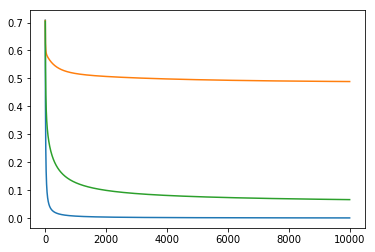

In [135]:
w = np.random.normal(loc=0.0, scale=0.01, size=(numFeatures, 1))
b = np.random.normal(loc=0.0, scale=0.01, size=(numLabels, 1))
W = []
B = []
numClasses = Y.shape[1]
for i in range(numClasses):
    W.append(w)
    B.append(b)
W = np.asarray(W)
B = np.asarray(B)

epochs = 10000
learning_rate = 1e-1
losses = []

for i in range(epochs):
    ls = []
    for j in range(numClasses):
        
        y = Y[:, j].reshape(numExamples, 1)
        
        z = np.add(np.matmul(X, W[j]), B[j])
        a = sigmoid(z)
        
        l = np.sum(- (y*np.log(a) + (1-y)*np.log(1-a)), axis=0, keepdims=True).T[0][0]/numExamples
        ls.append(l)
        dz = a - y
        
        dw = X*dz
        
        dw = np.sum(dw, axis=0, keepdims=True).T/numExamples
        db = np.sum(dz, axis=0, keepdims=True).T/numExamples
        
        W[j] = W[j] - learning_rate*dw
        B[j] = B[j] - learning_rate*db
    losses.append(ls)
losses = np.asarray(losses)
plt.plot(losses[:, 0])
plt.plot(losses[:, 1])
plt.plot(losses[:, 2])

In [152]:
for i in range(numClasses):
    y = Y[:, i].reshape(numExamples, 1)
    z = np.add(np.matmul(X, W[i]), B[i])
    a = sigmoid(z)
    A = []
    count = 0
    for j in range(numExamples):
        if a[j] >= 0.5 and y[j] == 1:
            count += 1
        elif a[j] < 0.5 and y[j] == 0:
            count += 1
        
    print('Class {} correct predictions : {}/{}'.format(1+i, count, numExamples))

Class 1 correct predictions : 150/150
Class 2 correct predictions : 111/150
Class 3 correct predictions : 147/150
